In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_soil_data.csv')
print(df.head())


  crop_type  soil_moisture  temperature  rainfall  humidity  irrigate
0    Cotton          44.29        22.05    136.07     74.18         0
1      Rice          39.50        38.87    269.40     67.04         0
2     Wheat          23.29        39.08      5.37     50.58         1
3      Rice          40.22        15.13    249.07     68.14         1
4    Cotton          25.46        23.09    200.94     59.02         1


In [3]:
# Separate features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']


KeyError: "['Label'] not found in axis"

In [4]:
print(df.columns)

Index(['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity',
       'irrigate'],
      dtype='object')


In [5]:
# Clean column names
df.columns = df.columns.str.strip()  # remove leading/trailing spaces
print(df.columns)  # check again


Index(['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity',
       'irrigate'],
      dtype='object')


In [7]:
print(df.columns.tolist())


['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity', 'irrigate']


In [8]:
X = df.drop('irrigate', axis=1)
y = df['irrigate']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid SettingWithCopyWarning
X_cleaned = X.copy()

# Encode all object-type columns in X
for col in X_cleaned.columns:
    if X_cleaned[col].dtype == 'object':
        X_cleaned[col] = LabelEncoder().fit_transform(X_cleaned[col])

# Check for success
print(X_cleaned.dtypes)


crop_type          int64
soil_moisture    float64
temperature      float64
rainfall         float64
humidity         float64
dtype: object


In [15]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('synthetic_soil_data.csv')

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# Clean column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # print cleaned column names

# Split features and target
X = df.drop('irrigate', axis=1)
y = df['irrigate']

# Make a copy of features to encode
X_cleaned = X.copy()

# Encode all object-type columns in X
for col in X_cleaned.columns:
    if X_cleaned[col].dtype == 'object':
        X_cleaned[col] = LabelEncoder().fit_transform(X_cleaned[col])

# If y is a string label, encode it too
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Check that all features are now numeric
print(X_cleaned.dtypes)


  crop_type  soil_moisture  temperature  rainfall  humidity  irrigate
0    Cotton          44.29        22.05    136.07     74.18         0
1      Rice          39.50        38.87    269.40     67.04         0
2     Wheat          23.29        39.08      5.37     50.58         1
3      Rice          40.22        15.13    249.07     68.14         1
4    Cotton          25.46        23.09    200.94     59.02         1
Index(['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity',
       'irrigate'],
      dtype='object')
['crop_type', 'soil_moisture', 'temperature', 'rainfall', 'humidity', 'irrigate']
crop_type          int64
soil_moisture    float64
temperature      float64
rainfall         float64
humidity         float64
dtype: object


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.55      0.52       191
           1       0.54      0.47      0.50       209

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400


Confusion Matrix:
 [[105  86]
 [110  99]]


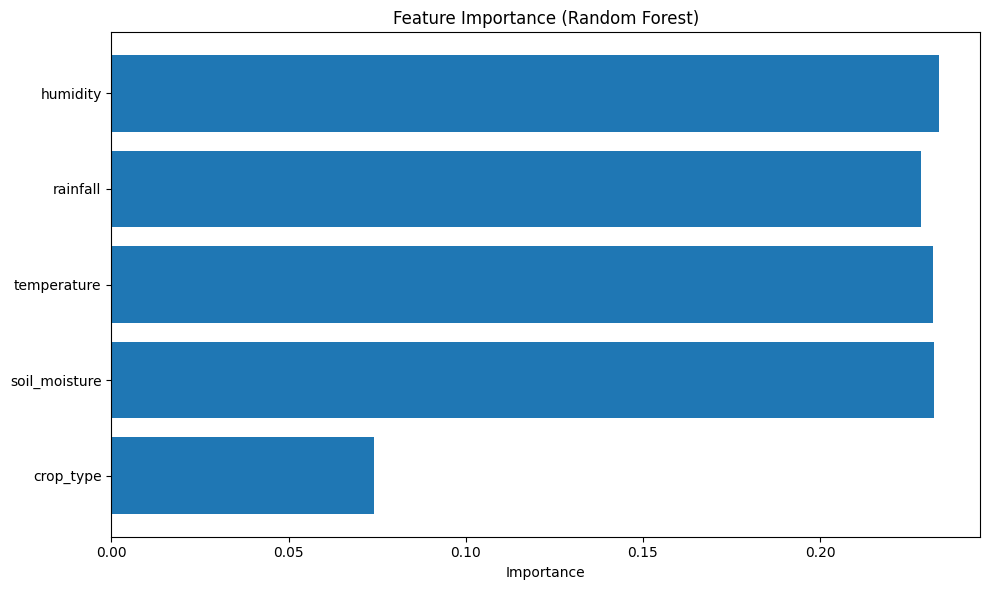

In [18]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_cleaned.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()
